# 챔스 리그페이즈 지표 분석
###### 2026-02-02 ~ 2026-02-05

## 1. 프로젝트 개요

### 1-1 분석 목적

2025년 09월 16일에 개막을 해서 2026년 5월 31일에 종료되는 25-26 UEFA 챔피언스 리그 대회  
결선 토너먼트 전 본선 리그 페이즈가 진행되는데 36개 팀 중에서 상위 8위는 자동으로 올라가고  
9-24위 팀들은 녹아웃 플레이오프로 가서 2차전 홈 앤드 어웨이 방식으로 해 이기는 팀이 결선 토너먼트로 올라가는 방식이다.  
지금 리그 페이즈가 끝난 시점에서 경기 지표를 활용해서 홈 어드밴티지가 존재했는지  
그리고 승리를 했던 팀들의 평균 지표가 어느정도이고 이 지표를 다 넘은 팀이 존재하는지  
마지막으로 녹아웃 플레이오프에서 어느팀이 결선에 진출할 지 예측하는게 목적이다.

### 1-2 분석 목표

- 홈 어드밴티지가 작용을 했는가?
- 녹아웃 플레이오프에서 어느 팀이 결선에 진출할까?

## 2. 환경 설정 및 분석 준비

In [1]:
from pathlib import Path

BASE_DIR = Path.cwd()
if BASE_DIR.name == "notebooks":
    BASE_DIR = BASE_DIR.parent

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 3. 데이터 구조 및 품질 확인

In [4]:
df = pd.read_csv(BASE_DIR/"data"/"champions_league_matches.csv")
df

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_shots_on_target,away_shots_on_target,home_saves,away_saves,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
0,2025-09-16,PSV,Union SG,1–3,Philips Stadion,Anthony Taylor,63%,37%,3 of 10,8 of 18,4 of 8,2 of 3,30.0,44.4,50.0,66.7,Away Win,Union SG
1,2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,38%,62%,2 of 11,6 of 11,4 of 6,2 of 2,18.2,54.5,66.7,100.0,Away Win,Arsenal
2,2025-09-16,Tottenham Hotspur,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,1 of 9,0 of 10,0 of 0,1 of 1,11.1,0.0,NaN,100.0,Home Win,Tottenham Hotspur
3,2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,3 of 14,5 of 10,2 of 5,1 of 3,21.4,50.0,40.0,33.3,Away Win,Qarabağ
4,2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,7 of 19,5 of 10,1 of 5,3 of 7,36.8,50.0,20.0,42.9,Draw,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2026-01-28,Barcelona,FC Copenhagen,4–1,Spotify Camp Nou,Benoît Bastien,77%,24%,13 of 28,1 of 6,0 of 1,8 of 13,46.4,16.7,0.0,61.5,Home Win,Barcelona
147,2026-01-28,Leverkusen,Villarreal,3–0,BayArena,Espen Eskås,65%,35%,7 of 15,2 of 5,2 of 2,4 of 7,46.7,40.0,100.0,57.1,Home Win,Leverkusen
148,2026-01-28,Paris Saint-Germain,Newcastle United,1–1,Parc des Princes,Slavko Vinčič,67%,33%,7 of 25,4 of 10,3 of 4,5 of 7,28.0,40.0,75.0,71.4,Draw,Draw
149,2026-01-28,Napoli,Chelsea,2–3,Stadio Diego Armando Maradona,Clément Turpin,46%,54%,5 of 8,5 of 11,2 of 5,3 of 5,62.5,45.5,40.0,60.0,Away Win,Chelsea


In [5]:
df[df['home_shots_on_target'].isnull()]

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_shots_on_target,away_shots_on_target,home_saves,away_saves,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


데이터 확인 결과
- 경기마다 home, away로 나누어 팀들의 경기 지표가 존재
- 컬럼 : 홈팀, 어웨이팀, 스코어, 경기장, 심판, 홈&어웨이 점유율, 홈&어웨이 유효슈팅(비율), 홈&어웨이 선방(비율),결과,승자팀
- 아예 정보가 없는 null 데이터들이 존재
- 예시로 2025-09-16 토트넘 vs 비야레알 경기에서 토트넘 선방한 적이 없어서 null값으로 존재

## 4. 데이터 전처리

### 4-1 공백 데이터 제거 및 null값이 존재하는 것들 0으로 치환

In [6]:
df = df.dropna(subset="date")

In [7]:
df.isnull().sum()

date                        0
home_team                   0
away_team                   0
score                       0
venue                       0
referee                     0
home_possession             0
away_possession             0
home_shots_on_target        0
away_shots_on_target        0
home_saves                  0
away_saves                  0
home_shots_on_target_pct    0
away_shots_on_target_pct    0
home_saves_pct              3
away_saves_pct              0
result                      0
winner                      0
dtype: int64

In [8]:
df = df.fillna(0)

In [9]:
df

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_shots_on_target,away_shots_on_target,home_saves,away_saves,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
0,2025-09-16,PSV,Union SG,1–3,Philips Stadion,Anthony Taylor,63%,37%,3 of 10,8 of 18,4 of 8,2 of 3,30.0,44.4,50.0,66.7,Away Win,Union SG
1,2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,38%,62%,2 of 11,6 of 11,4 of 6,2 of 2,18.2,54.5,66.7,100.0,Away Win,Arsenal
2,2025-09-16,Tottenham Hotspur,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,1 of 9,0 of 10,0 of 0,1 of 1,11.1,0.0,0.0,100.0,Home Win,Tottenham Hotspur
3,2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,3 of 14,5 of 10,2 of 5,1 of 3,21.4,50.0,40.0,33.3,Away Win,Qarabağ
4,2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,7 of 19,5 of 10,1 of 5,3 of 7,36.8,50.0,20.0,42.9,Draw,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2026-01-28,Barcelona,FC Copenhagen,4–1,Spotify Camp Nou,Benoît Bastien,77%,24%,13 of 28,1 of 6,0 of 1,8 of 13,46.4,16.7,0.0,61.5,Home Win,Barcelona
147,2026-01-28,Leverkusen,Villarreal,3–0,BayArena,Espen Eskås,65%,35%,7 of 15,2 of 5,2 of 2,4 of 7,46.7,40.0,100.0,57.1,Home Win,Leverkusen
148,2026-01-28,Paris Saint-Germain,Newcastle United,1–1,Parc des Princes,Slavko Vinčič,67%,33%,7 of 25,4 of 10,3 of 4,5 of 7,28.0,40.0,75.0,71.4,Draw,Draw
149,2026-01-28,Napoli,Chelsea,2–3,Stadio Diego Armando Maradona,Clément Turpin,46%,54%,5 of 8,5 of 11,2 of 5,3 of 5,62.5,45.5,40.0,60.0,Away Win,Chelsea


### 4-2 슈팅 수, 선방 수를 전체슈팅, 유효슈팅 전체선방, 키퍼선방으로 나누기

In [10]:
df[["home_shots_on_target", "home_total_shots"]] = (
    df["home_shots_on_target"].str.split(" of ", expand=True).astype(int)
)
df[["home_saves", "home_total_saves"]] = (
    df["home_saves"].str.split(" of ", expand=True).astype(int)
)
df[["away_shots_on_target", "away_total_shots"]] = (
    df["away_shots_on_target"].str.split(" of ", expand=True).astype(int)
)
df[["away_saves", "away_total_saves"]] = (
    df["away_saves"].str.split(" of ", expand=True).astype(int)
)

In [11]:
df

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_shots_on_target,away_shots_on_target,...,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner,home_total_shots,home_total_saves,away_total_shots,away_total_saves
0,2025-09-16,PSV,Union SG,1–3,Philips Stadion,Anthony Taylor,63%,37%,3,8,...,30.0,44.4,50.0,66.7,Away Win,Union SG,10,8,18,3
1,2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,38%,62%,2,6,...,18.2,54.5,66.7,100.0,Away Win,Arsenal,11,6,11,2
2,2025-09-16,Tottenham Hotspur,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,1,0,...,11.1,0.0,0.0,100.0,Home Win,Tottenham Hotspur,9,0,10,1
3,2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,3,5,...,21.4,50.0,40.0,33.3,Away Win,Qarabağ,14,5,10,3
4,2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,7,5,...,36.8,50.0,20.0,42.9,Draw,Draw,19,5,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2026-01-28,Barcelona,FC Copenhagen,4–1,Spotify Camp Nou,Benoît Bastien,77%,24%,13,1,...,46.4,16.7,0.0,61.5,Home Win,Barcelona,28,1,6,13
147,2026-01-28,Leverkusen,Villarreal,3–0,BayArena,Espen Eskås,65%,35%,7,2,...,46.7,40.0,100.0,57.1,Home Win,Leverkusen,15,2,5,7
148,2026-01-28,Paris Saint-Germain,Newcastle United,1–1,Parc des Princes,Slavko Vinčič,67%,33%,7,4,...,28.0,40.0,75.0,71.4,Draw,Draw,25,4,10,7
149,2026-01-28,Napoli,Chelsea,2–3,Stadio Diego Armando Maradona,Clément Turpin,46%,54%,5,5,...,62.5,45.5,40.0,60.0,Away Win,Chelsea,8,5,11,5


### 4-3 스코어 & result값을 홈팀 어웨이팀 W/D/L으로 나누기

In [12]:
df['score_clean'] = (
    df['score']
    .str.replace('–', '-', regex=False)
    .str.replace('—', '-', regex=False)
    .str.strip()
)

#노란박스 '-' -> Alt+0150 (En dash : 범수, 점수, 대결)
#긴 막대기 '—' -> Alt+0151 (Em dash : 문장 끊기)

In [13]:
df[['home_goals','away_goals']] = (
    df['score_clean']
    .str.split('-', expand=True)
    .apply(pd.to_numeric, errors='coerce')
)

In [14]:
def get_team_result(result, side):
    if result == "Draw":
        return "D"
    if side == "home":
        return "W" if result == "Home Win" else "L"
    if side == "away":
        return "W" if result == "Away Win" else "L"

In [15]:
df['home_result'] = df['result'].apply(lambda x: get_team_result(x, 'home'))
df['away_result'] = df['result'].apply(lambda x: get_team_result(x, 'away'))

In [16]:
df

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_shots_on_target,away_shots_on_target,...,winner,home_total_shots,home_total_saves,away_total_shots,away_total_saves,score_clean,home_goals,away_goals,home_result,away_result
0,2025-09-16,PSV,Union SG,1–3,Philips Stadion,Anthony Taylor,63%,37%,3,8,...,Union SG,10,8,18,3,1-3,1,3,L,W
1,2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,38%,62%,2,6,...,Arsenal,11,6,11,2,0-2,0,2,L,W
2,2025-09-16,Tottenham Hotspur,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,1,0,...,Tottenham Hotspur,9,0,10,1,1-0,1,0,W,L
3,2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,3,5,...,Qarabağ,14,5,10,3,2-3,2,3,L,W
4,2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,7,5,...,Draw,19,5,10,7,4-4,4,4,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2026-01-28,Barcelona,FC Copenhagen,4–1,Spotify Camp Nou,Benoît Bastien,77%,24%,13,1,...,Barcelona,28,1,6,13,4-1,4,1,W,L
147,2026-01-28,Leverkusen,Villarreal,3–0,BayArena,Espen Eskås,65%,35%,7,2,...,Leverkusen,15,2,5,7,3-0,3,0,W,L
148,2026-01-28,Paris Saint-Germain,Newcastle United,1–1,Parc des Princes,Slavko Vinčič,67%,33%,7,4,...,Draw,25,4,10,7,1-1,1,1,D,D
149,2026-01-28,Napoli,Chelsea,2–3,Stadio Diego Armando Maradona,Clément Turpin,46%,54%,5,5,...,Chelsea,8,5,11,5,2-3,2,3,L,W


### 4-4 점유율 % 빼서 정수형으로 변환

In [17]:
for col in ['home_possession','away_possession']:
    df[col] = df[col].str.replace("%","").astype(float)

In [18]:
df.columns
#shots_on_target : 유효슈팅
#shots_on_target_pct : 전체슈팅 중 유효슈팅 비율
#saves_pct : 선방률

Index(['date', 'home_team', 'away_team', 'score', 'venue', 'referee',
       'home_possession', 'away_possession', 'home_shots_on_target',
       'away_shots_on_target', 'home_saves', 'away_saves',
       'home_shots_on_target_pct', 'away_shots_on_target_pct',
       'home_saves_pct', 'away_saves_pct', 'result', 'winner',
       'home_total_shots', 'home_total_saves', 'away_total_shots',
       'away_total_saves', 'score_clean', 'home_goals', 'away_goals',
       'home_result', 'away_result'],
      dtype='object')

## 5. 데이터 분석

### 5-1 홈 어드밴티지는 존재할까?

In [19]:
# 홈팀 경기 지표
home_cols = [c for c in df.columns if c.startswith("home_")]
df_home = df[home_cols]
df_home = df_home.rename(columns={"home_team": "team"})
df_home

,team,home_possession,home_shots_on_target,home_saves,home_shots_on_target_pct,home_saves_pct,home_total_shots,home_total_saves,home_goals,home_result
0,PSV,63.0,3,4,30.0,50.0,10,8,1,L
1,Athletic Club,38.0,2,4,18.2,66.7,11,6,0,L
2,Tottenham Hotspur,58.0,1,0,11.1,0.0,9,0,1,W
3,Benfica,53.0,3,2,21.4,40.0,14,5,2,L
4,Juventus,52.0,7,1,36.8,20.0,19,5,4,D
...,...,...,...,...,...,...,...,...,...,...
146,Barcelona,77.0,13,0,46.4,0.0,28,1,4,W
147,Leverkusen,65.0,7,2,46.7,100.0,15,2,3,W
148,Paris Saint-Germain,67.0,7,3,28.0,75.0,25,4,1,D
149,Napoli,46.0,5,2,62.5,40.0,8,5,2,L


In [20]:
# 어웨이팀 경기 지표
away_cols = [c for c in df.columns if c.startswith("away_")]
df_away = df[away_cols]
df_away = df_away.rename(columns={"away_team": "team"})
df_away

,team,away_possession,away_shots_on_target,away_saves,away_shots_on_target_pct,away_saves_pct,away_total_shots,away_total_saves,away_goals,away_result
0,Union SG,37.0,8,2,44.4,66.7,18,3,3,W
1,Arsenal,62.0,6,2,54.5,100.0,11,2,2,W
2,Villarreal,42.0,0,1,0.0,100.0,10,1,0,L
3,Qarabağ,47.0,5,1,50.0,33.3,10,3,3,W
4,Dortmund,48.0,5,3,50.0,42.9,10,7,4,D
...,...,...,...,...,...,...,...,...,...,...
146,FC Copenhagen,24.0,1,8,16.7,61.5,6,13,1,L
147,Villarreal,35.0,2,4,40.0,57.1,5,7,0,L
148,Newcastle United,33.0,4,5,40.0,71.4,10,7,1,D
149,Chelsea,54.0,5,3,45.5,60.0,11,5,3,W


In [21]:
# 팀별 홈경기에서의 경기 지표
home_team_stats = (
    df_home
    .groupby("team", as_index=False)
    .agg(
        matches=("team", "count"),
        avg_possession=("home_possession", "mean"),
        avg_shot=("home_total_shots", "mean"),
        avg_shot_on_target=("home_shots_on_target_pct", "mean"),
        avg_save=("home_saves_pct", "mean"),
        avg_goals_for=("home_goals", "mean"),
    )
)
# 팀별 W/D/L 카운트 + 승률 계산
home_team_summary = (
    df_home
    .pivot_table(
        index="team",
        columns="home_result",
        aggfunc="size",
        fill_value=0
    )
)

home_team_stats = home_team_stats.merge(
    home_team_summary,
    on="team",
    how="left"
)
# 홈 경기에서 승률
home_team_stats["win_rate"] = (home_team_stats["W"] / home_team_stats["matches"])*100

In [22]:
home_team_stats = home_team_stats[[
    "team",
    "matches",
    "W",
    "D",
    "L",
    "win_rate",
    "avg_possession",
    "avg_shot",
    "avg_shot_on_target",
    "avg_save",
    "avg_goals_for",
]]
home_team_stats

,team,matches,W,D,L,win_rate,avg_possession,avg_shot,avg_shot_on_target,avg_save,avg_goals_for
0,Ajax,4,0,0,4,0.0,57.50,8.25,33.225,53.850,0.25
1,Arsenal,4,4,0,0,100.0,54.50,18.00,46.000,62.500,3.00
2,Atalanta,4,2,1,1,50.0,55.75,17.50,23.725,57.500,1.50
3,Athletic Club,4,1,1,2,25.0,40.25,12.50,18.825,61.675,1.25
4,Atlético Madrid,4,3,0,1,75.0,57.75,18.50,44.800,60.725,2.75
5,Barcelona,4,3,0,1,75.0,68.25,18.25,39.550,49.100,3.25
6,Bayern Munich,4,4,0,0,100.0,64.00,19.75,37.225,66.675,3.00
7,Benfica,4,2,0,2,50.0,44.75,17.50,35.750,68.350,2.00
8,Bodø/Glimt,4,1,1,2,25.0,52.00,15.25,35.375,67.925,1.75
9,Chelsea,4,4,0,0,100.0,62.25,16.50,39.075,75.000,2.50


In [23]:
# 팀별 어웨이경기에서의 경기 지표
away_team_stats = (
    df_away
    .groupby("team", as_index=False)
    .agg(
        matches=("team", "count"),
        avg_possession=("away_possession", "mean"),
        avg_shot=("away_total_shots", "mean"),
        avg_shot_on_target=("away_shots_on_target_pct", "mean"),
        avg_save=("away_saves_pct", "mean"),
        avg_goals_for=("away_goals", "mean"),
    )
)

# 팀별 W/D/L 카운트 + 승률 계산
away_team_summary = (
    df_away
    .pivot_table(
        index="team",
        columns="away_result",
        aggfunc="size",
        fill_value=0
    )
)

away_team_stats = away_team_stats.merge(
    away_team_summary,
    on="team",
    how="left"
)
# 어웨이 경기에서 승률
away_team_stats["win_rate"] = (away_team_stats["W"] / away_team_stats["matches"])*100

In [24]:
away_team_stats = away_team_stats[[
    "team",
    "matches",
    "W",
    "D",
    "L",
    "win_rate",
    "avg_possession",
    "avg_shot",
    "avg_shot_on_target",
    "avg_save",
    "avg_goals_for",
]]
away_team_stats

,team,matches,W,D,L,win_rate,avg_possession,avg_shot,avg_shot_on_target,avg_save,avg_goals_for
0,Ajax,4,2,0,2,50.0,50.25,12.50,34.675,56.250,1.75
1,Arsenal,4,4,0,0,100.0,54.75,15.50,50.475,93.750,2.75
2,Atalanta,4,2,0,2,50.0,49.50,12.25,28.700,77.875,1.00
3,Athletic Club,4,1,1,2,25.0,42.00,8.50,50.000,62.500,1.00
4,Atlético Madrid,4,1,1,2,25.0,48.75,12.75,35.600,58.325,1.50
5,Barcelona,4,2,1,1,50.0,61.25,16.75,38.100,58.325,2.25
6,Bayern Munich,4,3,0,1,75.0,53.50,15.00,46.350,71.775,2.50
7,Benfica,4,1,0,3,25.0,46.00,10.75,29.275,86.250,0.50
8,Bodø/Glimt,4,1,2,1,25.0,46.75,9.25,55.600,77.675,1.75
9,Chelsea,4,1,1,2,25.0,52.50,11.50,38.450,50.825,1.75


In [25]:
# 팀별 홈,어웨이 경기 스탯 
merged = pd.merge(
    home_team_stats,
    away_team_stats,
    on="team",
    suffixes=("_home", "_away")
)
merged

,team,matches_home,W_home,D_home,L_home,win_rate_home,avg_possession_home,avg_shot_home,avg_shot_on_target_home,avg_save_home,...,matches_away,W_away,D_away,L_away,win_rate_away,avg_possession_away,avg_shot_away,avg_shot_on_target_away,avg_save_away,avg_goals_for_away
0,Ajax,4,0,0,4,0.0,57.50,8.25,33.225,53.850,...,4,2,0,2,50.0,50.25,12.50,34.675,56.250,1.75
1,Arsenal,4,4,0,0,100.0,54.50,18.00,46.000,62.500,...,4,4,0,0,100.0,54.75,15.50,50.475,93.750,2.75
2,Atalanta,4,2,1,1,50.0,55.75,17.50,23.725,57.500,...,4,2,0,2,50.0,49.50,12.25,28.700,77.875,1.00
3,Athletic Club,4,1,1,2,25.0,40.25,12.50,18.825,61.675,...,4,1,1,2,25.0,42.00,8.50,50.000,62.500,1.00
4,Atlético Madrid,4,3,0,1,75.0,57.75,18.50,44.800,60.725,...,4,1,1,2,25.0,48.75,12.75,35.600,58.325,1.50
5,Barcelona,4,3,0,1,75.0,68.25,18.25,39.550,49.100,...,4,2,1,1,50.0,61.25,16.75,38.100,58.325,2.25
6,Bayern Munich,4,4,0,0,100.0,64.00,19.75,37.225,66.675,...,4,3,0,1,75.0,53.50,15.00,46.350,71.775,2.50
7,Benfica,4,2,0,2,50.0,44.75,17.50,35.750,68.350,...,4,1,0,3,25.0,46.00,10.75,29.275,86.250,0.50
8,Bodø/Glimt,4,1,1,2,25.0,52.00,15.25,35.375,67.925,...,4,1,2,1,25.0,46.75,9.25,55.600,77.675,1.75
9,Chelsea,4,4,0,0,100.0,62.25,16.50,39.075,75.000,...,4,1,1,2,25.0,52.50,11.50,38.450,50.825,1.75


In [26]:
# 홈&어웨이 경기 지표 차이 
diff_table = pd.DataFrame()

diff_table["team"] = merged["team"]

diff_table["win_rate"] = merged["win_rate_home"] - merged["win_rate_away"]
diff_table["goals"] = merged["avg_goals_for_home"] - merged["avg_goals_for_away"]
diff_table["possession"] = merged["avg_possession_home"] - merged["avg_possession_away"]
diff_table["shot"] = merged["avg_shot_home"] - merged["avg_shot_away"]
diff_table["shot_on_target"] = merged["avg_shot_on_target_home"] - merged["avg_shot_on_target_away"]
diff_table["save"] = merged["avg_save_home"] - merged["avg_save_away"]
diff_table["W"] = merged["W_home"] - merged["W_away"]
diff_table["D"] = merged["D_home"] - merged["D_away"]
diff_table["L"] = merged["L_home"] - merged["L_away"]

In [27]:
diff_rank = diff_table.sort_values("win_rate",ascending=False).reset_index(drop=True)
diff_rank.index = diff_rank.index + 1

In [28]:
diff_rank

,team,win_rate,goals,possession,shot,shot_on_target,save,W,D,L
1,Tottenham Hotspur,75.0,0.75,11.50,2.50,1.625,8.325,3,-2,-1
2,Sporting CP,75.0,1.25,-3.75,9.75,8.450,31.250,3,-1,-2
3,Chelsea,75.0,0.75,9.75,5.00,0.625,24.175,3,-1,-2
4,Newcastle United,50.0,0.25,4.50,-2.00,7.325,7.875,2,-2,0
5,Atlético Madrid,50.0,1.25,9.00,5.75,9.200,2.400,2,-1,-1
6,Pafos FC,50.0,2.00,9.25,3.50,-3.625,-11.400,2,-1,-1
7,Napoli,50.0,0.75,4.75,4.00,-4.300,23.125,2,0,-2
8,Dortmund,25.0,0.25,4.50,5.00,4.850,-1.800,1,0,-1
9,Eintracht Frankfurt,25.0,0.50,3.25,0.25,-19.150,-0.625,1,-1,0
10,Manchester City,25.0,0.25,-5.50,3.50,-2.125,25.425,1,-1,0


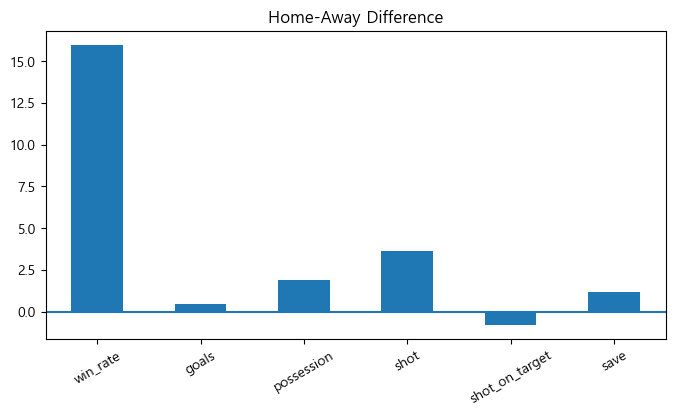

In [29]:
data_stat = ["win_rate", "goals", "possession", "shot", "shot_on_target", "save"]

mean_diff = diff_rank[data_stat].mean()

plt.figure(figsize=(8, 4))
mean_diff.plot(kind="bar")
plt.axhline(0)
plt.title("Home-Away Difference")
plt.xticks(rotation=30)
plt.show()

In [30]:
s = diff_table["win_rate"].dropna()
t_stat, p_value = stats.ttest_1samp(s, popmean=0)
print(f"p-value = {p_value:.4f}")

p-value = 0.0025


In [31]:
# 다른 지표들도 홈 어드밴티지가 적용되는지
for m in data_stat:
    s = diff_table[m].dropna()
    t, p = stats.ttest_1samp(s, popmean=0)

    print(f"\n[{m}]")
    print(f"p-value = {p:.4f}")


[win_rate]
p-value = 0.0025

[goals]
p-value = 0.0005

[possession]
p-value = 0.0783

[shot]
p-value = 0.0000

[shot_on_target]
p-value = 0.6752

[save]
p-value = 0.6485


In [32]:
summary = diff_table[data_stat].agg(["mean", "median"])

summary.T

,mean,median
win_rate,15.972222,25.000
goals,0.479167,0.500
possession,1.875000,3.750
shot,3.645833,3.500
shot_on_target,-0.797917,-0.225
save,1.152778,0.725


결론
- 승률(0.0025), 득점(0.0005), 슈팅 수(0.0000)의 p-value값이 0.05보다 작으므로 이번 챔스에서는 홈 어드밴티지는 작용한다고 볼 수 있다.
- 점유율(0.0783),유효슈팅 수(0.6752), 선방(0.6485)은 홈-어웨이에서의 차이가 미미하게 있다고 볼 수 있다.
- 이번 챔스에서는 홈 경기에서 더 많은 공격 기회를 만들어 득점 기회 창출하는 플레이가 나와 홈 어드밴티지가 작용한다고 할 수 있다.

## 5-2 승리했을 때 팀들의 평균 지표

In [33]:
df_home_win = df_home[df_home["home_result"] == 'W']
df_home_win

,team,home_possession,home_shots_on_target,home_saves,home_shots_on_target_pct,home_saves_pct,home_total_shots,home_total_saves,home_goals,home_result
2,Tottenham Hotspur,58.0,1,0,11.1,0.0,9,0,1,W
5,Real Madrid,43.0,15,4,53.6,80.0,28,5,2,W
8,Liverpool,56.0,6,2,30.0,50.0,20,4,3,W
10,Bayern Munich,56.0,5,2,31.2,66.7,16,3,3,W
11,Paris Saint-Germain,67.0,13,2,59.1,100.0,22,2,4,W
...,...,...,...,...,...,...,...,...,...,...
139,Union SG,36.0,4,2,50.0,100.0,8,2,1,W
141,Club Brugge,38.0,5,9,45.5,100.0,11,9,3,W
146,Barcelona,77.0,13,0,46.4,0.0,28,1,4,W
147,Leverkusen,65.0,7,2,46.7,100.0,15,2,3,W


In [34]:
df_away_win = df_away[df_away["away_result"]== 'W']
df_away_win

,team,away_possession,away_shots_on_target,away_saves,away_shots_on_target_pct,away_saves_pct,away_total_shots,away_total_saves,away_goals,away_result
0,Union SG,37.0,8,2,44.4,66.7,18,3,3,W
1,Arsenal,62.0,6,2,54.5,100.0,11,2,2,W
3,Qarabağ,47.0,5,1,50.0,33.3,10,3,3,W
9,Inter,44.0,4,2,28.6,100.0,14,2,2,W
16,Barcelona,65.0,5,5,26.3,83.3,19,6,2,W
25,Real Madrid,67.0,12,4,60.0,100.0,20,4,5,W
27,Bayern Munich,67.0,15,1,57.7,50.0,26,2,5,W
28,Newcastle United,57.0,6,6,46.2,100.0,13,6,4,W
31,Paris Saint-Germain,53.0,7,0,46.7,0.0,15,3,2,W
41,Paris Saint-Germain,71.0,8,1,33.3,33.3,24,3,7,W


In [35]:
df_total_win = pd.concat([
    df_home_win.rename(columns=lambda x: x.replace("home_", "")),
    df_away_win.rename(columns=lambda x: x.replace("away_", ""))
], ignore_index=True)
df_total_win

,team,possession,shots_on_target,saves,shots_on_target_pct,saves_pct,total_shots,total_saves,goals,result
0,Tottenham Hotspur,58.0,1,0,11.1,0.0,9,0,1,W
1,Real Madrid,43.0,15,4,53.6,80.0,28,5,2,W
2,Liverpool,56.0,6,2,30.0,50.0,20,4,3,W
3,Bayern Munich,56.0,5,2,31.2,66.7,16,3,3,W
4,Paris Saint-Germain,67.0,13,2,59.1,100.0,22,2,4,W
...,...,...,...,...,...,...,...,...,...,...
114,Tottenham Hotspur,55.0,6,1,40.0,100.0,15,1,2,W
115,Olympiacos,37.0,3,2,27.3,50.0,11,4,2,W
116,Bodø/Glimt,35.0,7,7,63.6,87.5,11,8,2,W
117,Sporting CP,65.0,6,0,66.7,0.0,9,2,3,W


In [36]:
#승리했을 때의 평균 지표
col = ["possession","total_shots","shots_on_target_pct","total_saves","saves_pct","goals"]
df_total_stat = df_total_win[col].agg(["mean"])
df_total_stat = df_total_stat.T
df_total_stat

,mean
possession,52.806723
total_shots,15.739496
shots_on_target_pct,44.235294
total_saves,3.554622
saves_pct,74.684874
goals,2.865546


In [37]:
#리그페이즈 내에서 팀들의 평균 지표
df_total = pd.concat([
    df_home.rename(columns=lambda x: x.replace("home_", "")),
    df_away.rename(columns=lambda x: x.replace("away_", ""))
], ignore_index=True)
df_total

,team,possession,shots_on_target,saves,shots_on_target_pct,saves_pct,total_shots,total_saves,goals,result
0,PSV,63.0,3,4,30.0,50.0,10,8,1,L
1,Athletic Club,38.0,2,4,18.2,66.7,11,6,0,L
2,Tottenham Hotspur,58.0,1,0,11.1,0.0,9,0,1,W
3,Benfica,53.0,3,2,21.4,40.0,14,5,2,L
4,Juventus,52.0,7,1,36.8,20.0,19,5,4,D
...,...,...,...,...,...,...,...,...,...,...
283,FC Copenhagen,24.0,1,8,16.7,61.5,6,13,1,L
284,Villarreal,35.0,2,4,40.0,57.1,5,7,0,L
285,Newcastle United,33.0,4,5,40.0,71.4,10,7,1,D
286,Chelsea,54.0,5,3,45.5,60.0,11,5,3,W


In [38]:
df_total_avg = df_total.groupby("team").agg({
    "possession" : "mean",
    "shots_on_target" : "mean",
    "saves" : "mean",
    "shots_on_target_pct" : "mean",
    "saves_pct" : "mean",
    "total_shots" : "mean",
    "total_saves" : "mean",
    "goals" : "mean"
}).reset_index()

In [39]:
#승점 순위대로 나열
df_total_avg["points"] = merged["W_home"]*3 + merged["W_away"]*3 + merged["D_home"] + merged["D_away"]
df_total_avg = df_total_avg.sort_values("points",ascending=False).reset_index(drop=True)
df_total_avg.index = df_total_avg.index + 1

In [40]:
df_total_avg

,team,possession,shots_on_target,saves,shots_on_target_pct,saves_pct,total_shots,total_saves,goals,points
1,Arsenal,54.625,7.875,2.250,48.2375,78.1250,16.750,2.750,2.875,24
2,Bayern Munich,58.750,7.625,3.125,41.7875,69.2250,17.375,4.000,2.750,21
3,Liverpool,54.750,7.875,2.000,40.4125,69.7875,19.875,3.000,2.500,18
4,Tottenham Hotspur,50.750,4.750,2.750,36.1125,70.8375,12.500,3.625,2.125,17
5,Sporting CP,48.625,4.875,3.375,39.6500,65.6250,11.125,4.625,2.125,16
6,Barcelona,64.750,6.875,2.625,38.8250,53.7125,17.500,4.250,2.750,16
7,Manchester City,60.000,7.000,1.625,46.7375,56.0375,15.750,2.750,1.875,16
8,Chelsea,57.375,5.375,2.000,38.7625,62.9125,14.000,3.125,2.125,16
9,Real Madrid,58.000,7.250,5.375,35.5875,81.0000,19.500,7.000,2.625,15
10,Inter,55.625,5.375,2.750,31.3750,80.8375,16.875,3.750,1.875,15


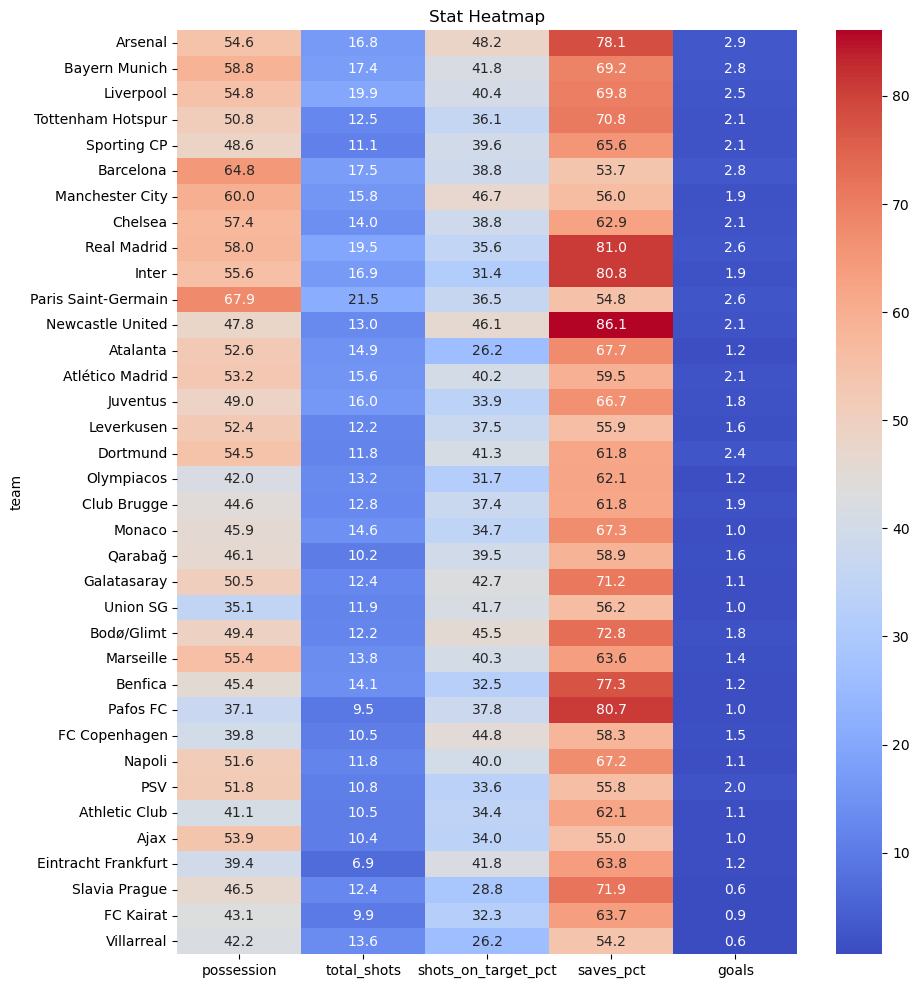

In [41]:
plt.rcParams["font.family"] = "DejaVu Sans"

avg_stat = ["possession","total_shots","shots_on_target_pct","saves_pct","goals"]

plt.figure(figsize=(10,12))
sns.heatmap(df_total_avg.set_index("team")[avg_stat],
            cmap="coolwarm",
            annot=True,
            fmt=".1f")

plt.title("Stat Heatmap")
plt.show()

In [42]:
top3_stat = ["goals","possession","shots_on_target_pct","saves_pct"]
for m in top3_stat:
    print(f"\n[{m} Top3]")
    print(df_total_avg[["team",m]].sort_values(m, ascending=False).head(3))


[goals Top3]
            team  goals
1        Arsenal  2.875
6      Barcelona  2.750
2  Bayern Munich  2.750

[possession Top3]
                   team  possession
11  Paris Saint-Germain      67.875
6             Barcelona      64.750
7       Manchester City      60.000

[shots_on_target_pct Top3]
                team  shots_on_target_pct
1            Arsenal              48.2375
7    Manchester City              46.7375
12  Newcastle United              46.0875

[saves_pct Top3]
                team  saves_pct
12  Newcastle United    86.0625
9        Real Madrid    81.0000
10             Inter    80.8375


In [43]:
stat_mean = df_total_stat["mean"]
stat_target = ["possession", "shots_on_target_pct","saves_pct"]
meets = df_total_avg[stat_target].gt(stat_mean[stat_target], axis=1)

In [44]:
teams_all_above = df_total_avg.loc[meets.all(axis=1), "team"]
teams_all_above

1    Arsenal
Name: team, dtype: object

결론 
- 승리했을 때의 팀들의 평균 스탯을 넘긴 팀 : 아스널
- 골 평균 Top3 : 아스널(2.875), 바르셀로나(2.75), 바이에르뮌헨(2.75)
- 점유율 Top3 : PSG(약 67.9%), 바르셀로나(약 64.8%), 맨체스터 시티(60%)
- 유효슈팅 Top3 : 아스널(약 48.2%), 맨체스터 시티(약 46.7%), 뉴캐슬(약 46.1%)
- 선방률 Top3 : 뉴캐슬(약 86.1%), 레알마드리드(81%), 인테르(약 80.8%)

## 5-3 결선 16강 8팀은 확정 다음 8팀은 어느 팀이 올라갈까?

In [45]:
df_total_avg

,team,possession,shots_on_target,saves,shots_on_target_pct,saves_pct,total_shots,total_saves,goals,points
1,Arsenal,54.625,7.875,2.250,48.2375,78.1250,16.750,2.750,2.875,24
2,Bayern Munich,58.750,7.625,3.125,41.7875,69.2250,17.375,4.000,2.750,21
3,Liverpool,54.750,7.875,2.000,40.4125,69.7875,19.875,3.000,2.500,18
4,Tottenham Hotspur,50.750,4.750,2.750,36.1125,70.8375,12.500,3.625,2.125,17
5,Sporting CP,48.625,4.875,3.375,39.6500,65.6250,11.125,4.625,2.125,16
6,Barcelona,64.750,6.875,2.625,38.8250,53.7125,17.500,4.250,2.750,16
7,Manchester City,60.000,7.000,1.625,46.7375,56.0375,15.750,2.750,1.875,16
8,Chelsea,57.375,5.375,2.000,38.7625,62.9125,14.000,3.125,2.125,16
9,Real Madrid,58.000,7.250,5.375,35.5875,81.0000,19.500,7.000,2.625,15
10,Inter,55.625,5.375,2.750,31.3750,80.8375,16.875,3.750,1.875,15


리그 페이즈 9위~24위였던 팀들 중 9~16위에 해당하는 팀들은 시드팀 그 외 비시드팀으로 추첨을 해서  
2차전으로 이기는 팀이 결선에 올라가는 녹아웃 플레이오프전이 진행이 된다.

In [ ]:
features = ["possession", "shots_on_target_pct", "saves_pct"]

scaler = StandardScaler()
df_total_avg["base_score"] = scaler.fit_transform(df_total_avg[features]).mean(axis=1)

In [58]:
home_adv_weight = diff_table.set_index("team")["win_rate"]

In [59]:
def predict_playoff(teamA, teamB):
    scoreA = df_total_avg.loc[df_total_avg.team == teamA, "base_score"].values[0]
    scoreB = df_total_avg.loc[df_total_avg.team == teamB, "base_score"].values[0]

    advA = home_adv_weight.get(teamA, 0)
    advB = home_adv_weight.get(teamB, 0)

    # 1차전 (A홈)
    first_leg = scoreA + advA - scoreB

    # 2차전 (B홈)
    second_leg = scoreB + advB - scoreA

    total = first_leg - second_leg

    winner = teamA if total > 0 else teamB

    return {
        "teamA": teamA,
        "teamB": teamB,
        "predicted_winner": winner,
        "score_gap": round(total, 3)
    }

In [60]:
matchups = [
    ("Galatasaray", "Juventus"),
    ("Monaco", "Paris Saint-Germain"),
    ("Qarabağ", "Newcastle United"),
    ("Bodø/Glimt", "Inter"),
    ("Dortmund", "Atalanta"),
    ("Benfica", "Real Madrid"),
    ("Olympiacos", "Leverkusen"),
    ("Club Brugge", "Atlético Madrid")
]

In [61]:
results = [predict_playoff(a, b) for a, b in matchups]

pred_df = pd.DataFrame(results)
pred_df

,teamA,teamB,predicted_winner,score_gap
0,Galatasaray,Juventus,Galatasaray,1.582
1,Monaco,Paris Saint-Germain,Paris Saint-Germain,-1.248
2,Qarabağ,Newcastle United,Newcastle United,-28.069
3,Bodø/Glimt,Inter,Bodø/Glimt,25.562
4,Dortmund,Atalanta,Dortmund,26.583
5,Benfica,Real Madrid,Real Madrid,-1.808
6,Olympiacos,Leverkusen,Leverkusen,-1.168
7,Club Brugge,Atlético Madrid,Atlético Madrid,-25.952


In [62]:
for r in results:
    print(f"{r['teamA']} vs {r['teamB']} → 예상 승자: {r['predicted_winner']} (gap {r['score_gap']})")

Galatasaray vs Juventus → 예상 승자: Galatasaray (gap 1.582)
Monaco vs Paris Saint-Germain → 예상 승자: Paris Saint-Germain (gap -1.248)
Qarabağ vs Newcastle United → 예상 승자: Newcastle United (gap -28.069)
Bodø/Glimt vs Inter → 예상 승자: Bodø/Glimt (gap 25.562)
Dortmund vs Atalanta → 예상 승자: Dortmund (gap 26.583)
Benfica vs Real Madrid → 예상 승자: Real Madrid (gap -1.808)
Olympiacos vs Leverkusen → 예상 승자: Leverkusen (gap -1.168)
Club Brugge vs Atlético Madrid → 예상 승자: Atlético Madrid (gap -25.952)


지표에 따른 결과 예상
- 가라바흐 VS 뉴캐슬 : 뉴캐슬 압도적 우세 (gap: 28.069)
- 도르트문트 VS 아탈란타 : 도르투문트 압도적 우세(gap: 26.583)
- 클뤼프 브뤼허 VS 아틀레티코 마드리드 : 아틀레티코 마드리드 압도적 우세(gap: 25.583)
- 보되/글림트 VS 인테르 : 보되/글림트 압도적 우세(gap: 25.562)
- 벤피카 VS 레알마드리드 : 레알마드리드 약한 우세(gap: 1.808)
- 갈라타사라이 VS 유벤투스 : 유벤투스 약한 우세(gap: 1.582)
- 모나코 VS 파리생제르맹 : 파리생제르맹 약한 우세(gap: 1.248)
- 올림피아코스 VS 레버쿠젠 : 레버쿠젠 약한 우세(gap: 1.168)

녹아웃에서 결선 진출팀 8팀 예상
- 뉴캐슬, 도르트문트, 아틀레티코마드리드, 보되/글림트  
레알마드리드, 파리생제르맹, 레버쿠젠, 유벤투스

몬테 카를로: 무작위 추출된 난수를 이용하여 원하는 함수의 값을 계산하기 위한 시뮬레이션 방법

In [52]:
#몬테 카를로 함수
from sklearn.preprocessing import StandardScaler

# 1) 기본 파워 점수(지표는 네 컬럼명에 맞게)
features = ["goals", "possession", "shots_on_target_pct", "saves_pct"]
X = df_total_avg[features].copy()

scaler = StandardScaler()
df_total_avg["base_score"] = scaler.fit_transform(X).mean(axis=1)

base = df_total_avg.set_index("team")["base_score"]

# 2) 홈 어드밴티지(승률 차이 컬럼명이 win_rate 라고 가정)
home_adv = diff_table.set_index("team")["win_rate"]

In [53]:
#몬테카를로 함수
def simulate_playoff(teamA, teamB, n=10000, sigma=0.6, adv_scale=0.02, seed=42):
    """
    sigma: 경기 변동성(클수록 이변 증가)
    adv_scale: home_adv(win_rate가 %p 단위일 때) → 점수로 바꾸는 스케일
              예: win_rate=25 (%p)면 25*0.02=0.5점 홈버프
    """
    rng = np.random.default_rng(seed)

    a_base = float(base.get(teamA, 0))
    b_base = float(base.get(teamB, 0))

    a_adv = float(home_adv.get(teamA, 0)) * adv_scale
    b_adv = float(home_adv.get(teamB, 0)) * adv_scale

    # 1차전: A 홈
    leg1 = (a_base + a_adv + rng.normal(0, sigma, n)) - (b_base + rng.normal(0, sigma, n))

    # 2차전: B 홈
    leg2 = (b_base + b_adv + rng.normal(0, sigma, n)) - (a_base + rng.normal(0, sigma, n))

    # 두 경기 합산(양수면 A가 우세했다고 보고 통과)
    total = leg1 - leg2

    prob_A = (total > 0).mean()
    prob_B = 1 - prob_A

    return prob_A, prob_B

In [54]:
rows = []
for a, b in matchups:
    pA, pB = simulate_playoff(a, b, n=20000, sigma=0.6, adv_scale=0.02, seed=42)
    rows.append({
        "teamA": a,
        "teamB": b,
        "prob_teamA": pA,
        "prob_teamB": pB,
        "predicted": a if pA > 0.5 else b
    })

prob_table = pd.DataFrame(rows)
prob_table["prob_teamA"] = (prob_table["prob_teamA"]*100).round(1)
prob_table["prob_teamB"] = (prob_table["prob_teamB"]*100).round(1)

prob_table

,teamA,teamB,prob_teamA,prob_teamB,predicted
0,Galatasaray,Juventus,71.7,28.3,Galatasaray
1,Monaco,Paris Saint-Germain,3.4,96.6,Paris Saint-Germain
2,Qarabağ,Newcastle United,0.5,99.5,Newcastle United
3,Bodø/Glimt,Inter,75.1,24.9,Bodø/Glimt
4,Dortmund,Atalanta,98.4,1.6,Dortmund
5,Benfica,Real Madrid,2.2,97.8,Real Madrid
6,Olympiacos,Leverkusen,16.6,83.4,Leverkusen
7,Club Brugge,Atlético Madrid,12.3,87.7,Atlético Madrid


In [55]:
prob_table["confidence"] = (prob_table["prob_teamA"] - 50).abs()
prob_table.sort_values("confidence", ascending=False)

,teamA,teamB,prob_teamA,prob_teamB,predicted,confidence
2,Qarabağ,Newcastle United,0.5,99.5,Newcastle United,49.5
4,Dortmund,Atalanta,98.4,1.6,Dortmund,48.4
5,Benfica,Real Madrid,2.2,97.8,Real Madrid,47.8
1,Monaco,Paris Saint-Germain,3.4,96.6,Paris Saint-Germain,46.6
7,Club Brugge,Atlético Madrid,12.3,87.7,Atlético Madrid,37.7
6,Olympiacos,Leverkusen,16.6,83.4,Leverkusen,33.4
3,Bodø/Glimt,Inter,75.1,24.9,Bodø/Glimt,25.1
0,Galatasaray,Juventus,71.7,28.3,Galatasaray,21.7


In [56]:
def run_compare(a,b):
    p_on = simulate_playoff(a,b,n=20000,sigma=0.6,adv_scale=0.02,seed=42)[0]
    p_off = simulate_playoff(a,b,n=20000,sigma=0.6,adv_scale=0.0,seed=42)[0]
    return p_on, p_off

# 예: PSG vs Monaco
p_on, p_off = run_compare("Monaco","Paris Saint-Germain")
print("홈어드 반영:", round(p_on*100,1), "% / 미반영:", round(p_off*100,1), "%")

홈어드 반영: 3.4 % / 미반영: 3.4 %
